In [48]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)



In [49]:
df = pd.read_csv("tickbite_final.csv")
print(df.shape)

print(df)


(18522, 5)
          MONTH  AGE  ACTIVITY  LANDUSE  BITE_STATUS
0       January    2         5       60         True
1       January    2         2       20         True
2       January    3         5       20         True
3       January    2         5       62         True
4       January    2         1       60         True
...         ...  ...       ...      ...          ...
18517  December    3         3       60         True
18518  December    2         7       60         True
18519  December    1         3       61         True
18520  December    3         5       60         True
18521  December    2         7       61         True

[18522 rows x 5 columns]


In [50]:
df.describe()

,AGE,ACTIVITY,LANDUSE
count,18522.000000,18522.000000,18522.000000
mean,1.951247,2.273567,54.936886
std,0.414557,1.890171,13.689711
min,1.000000,1.000000,20.000000
25%,2.000000,1.000000,60.000000
50%,2.000000,1.000000,60.000000
75%,2.000000,3.000000,60.000000
max,3.000000,7.000000,62.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18522 entries, 0 to 18521
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MONTH        18522 non-null  object
 1   AGE          18522 non-null  int64 
 2   ACTIVITY     18522 non-null  int64 
 3   LANDUSE      18522 non-null  int64 
 4   BITE_STATUS  18522 non-null  bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 597.0+ KB


In [52]:
# check if there are missing values 
df.isnull().sum().sort_values(ascending=False)

BITE_STATUS    0
LANDUSE        0
ACTIVITY       0
AGE            0
MONTH          0
dtype: int64

In [53]:
df['AGE'] = df['AGE'].astype('str')
df['ACTIVITY'] = df['ACTIVITY'].astype('str')
df['LANDUSE'] = df['LANDUSE'].astype('str')
df['BITE_STATUS'] = df['BITE_STATUS'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18522 entries, 0 to 18521
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MONTH        18522 non-null  object
 1   AGE          18522 non-null  object
 2   ACTIVITY     18522 non-null  object
 3   LANDUSE      18522 non-null  object
 4   BITE_STATUS  18522 non-null  int32 
dtypes: int32(1), object(4)
memory usage: 651.3+ KB


In [54]:
print(df['MONTH'].unique())
print(df['AGE'].unique())
print(df['ACTIVITY'].unique())
print(df['LANDUSE'].unique())

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
['2' '3' '1']
['5' '2' '1' '7' '3' '4' '6']
['60' '20' '62' '61']


In [55]:
print(df)

          MONTH AGE ACTIVITY LANDUSE  BITE_STATUS
0       January   2        5      60            1
1       January   2        2      20            1
2       January   3        5      20            1
3       January   2        5      62            1
4       January   2        1      60            1
...         ...  ..      ...     ...          ...
18517  December   3        3      60            1
18518  December   2        7      60            1
18519  December   1        3      61            1
18520  December   3        5      60            1
18521  December   2        7      61            1

[18522 rows x 5 columns]


In [56]:
# export the csv
df.to_csv('tickbite.csv',index=False)

# Visulization 

In [57]:
# group by month
month = df.groupby(['MONTH']).sum()
print(month)

           BITE_STATUS
MONTH                 
April             2350
August            2314
December           447
February           368
January            272
July              2870
June              2633
March              614
May               2655
November           497
October           1034
September         2468


In [58]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month = month.reindex(new_order, axis=0)
print(month)
print(month.info())

           BITE_STATUS
MONTH                 
January            272
February           368
March              614
April             2350
May               2655
June              2633
July              2870
August            2314
September         2468
October           1034
November           497
December           447
<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, January to December
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   BITE_STATUS  12 non-null     int32
dtypes: int32(1)
memory usage: 144.0+ bytes
None


In [59]:
# group by age
age = df.groupby(['AGE']).sum()
print(age)

# group by activity 
activity = df.groupby(['ACTIVITY']).sum()
print(activity)

# group by land-use type
landuse = df.groupby(['LANDUSE']).sum()
print(landuse)

     BITE_STATUS
AGE             
1           2065
2          15295
3           1162
          BITE_STATUS
ACTIVITY             
1               10543
2                1885
3                2854
4                 286
5                1220
6                 146
7                1588
         BITE_STATUS
LANDUSE             
20              2461
60             13170
61              1121
62              1770


Text(0.5, 1.05, 'The distribution of tick bites in different variables')

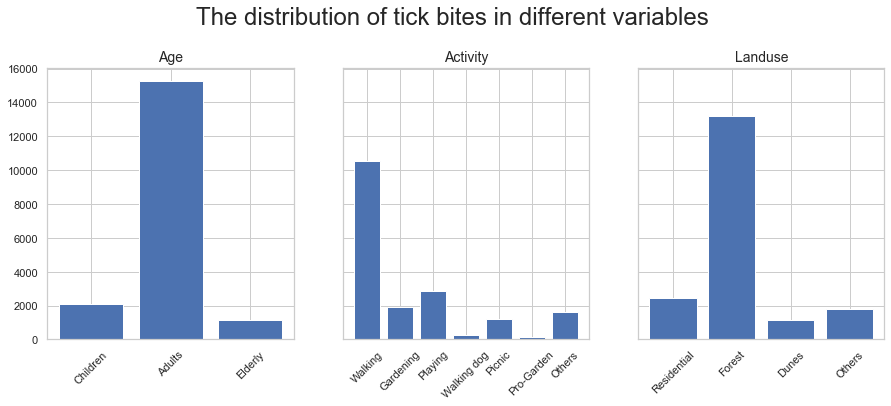

In [60]:
# Plot all the tick-bite counts of differnt variables
# generating multiple plots

label_age =['Children','Adults','Elderly']
label_activity = ['Walking','Gardening','Playing','Walking dog','Picnic','Pro-Garden','Others']
label_landuse = ['Residential','Forest','Dunes','Others']

fig, axs = plt.subplots(1, 3, figsize=(15, 5),sharey=True)


axs[0].bar(age.index,age['BITE_STATUS'])
axs[0].set_xticklabels(label_age,rotation = 45)
axs[0].set_title('Age',fontsize=14)

axs[1].bar(label_activity,activity['BITE_STATUS'],)
axs[1].set_xticklabels(label_activity,rotation = 45)
axs[1].set_title('Activity',fontsize=14)

axs[2].bar(label_landuse,landuse['BITE_STATUS'])
axs[2].set_xticklabels(label_landuse,rotation = 45)
axs[2].set_title('Landuse',fontsize=14)

fig.suptitle('The distribution of tick bites in different variables',fontsize=24,y=1.05)

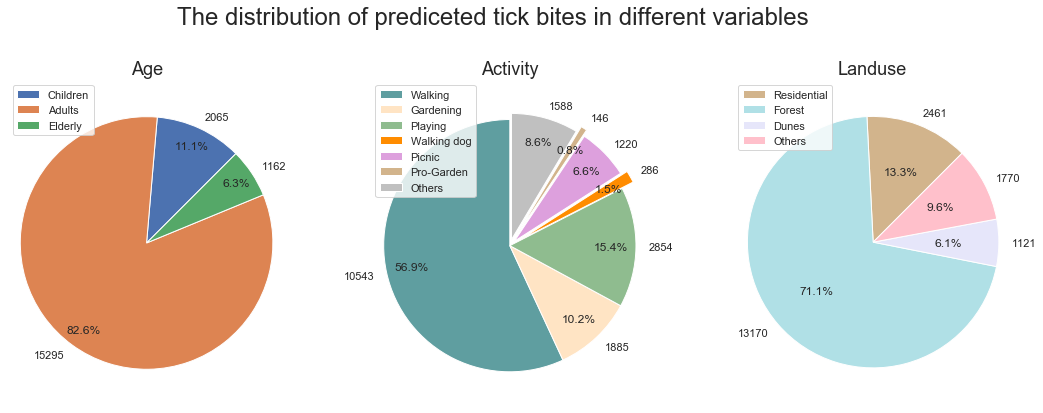

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.subplots_adjust(wspace=.3)

axs[0].pie(age['BITE_STATUS'], labels=age['BITE_STATUS'],autopct='%1.1f%%', startangle=45,pctdistance=0.85)
axs[0].legend(label_age,loc="best")
axs[0].axis('equal')
axs[0].set_title('Age',fontsize=18)


color1 = ['cadetblue','bisque','darkseagreen','darkorange','plum','tan','silver']
axs[1].pie(activity['BITE_STATUS'],labels=activity['BITE_STATUS'],colors = color1, autopct='%1.1f%%', startangle=90,pctdistance=0.8,explode=(0,0,0,0.1,0.05,0.1,0.05))
axs[1].legend(label_activity,loc="best")
axs[1].axis('equal')
axs[1].set_title('Activity',fontsize=18)

color2 = ['tan','powderblue','lavender','pink']
axs[2].pie(landuse['BITE_STATUS'],labels=landuse['BITE_STATUS'],colors = color2, autopct='%1.1f%%', startangle=45)
axs[2].legend(label_landuse,loc="best")
axs[2].axis('equal')
axs[2].set_title('Landuse',fontsize=18)

fig.suptitle('The distribution of prediceted tick bites in different variables',fontsize=24,y=1.05)

plt.savefig("predicetd_tickbites_distribution.png",dpi=300)

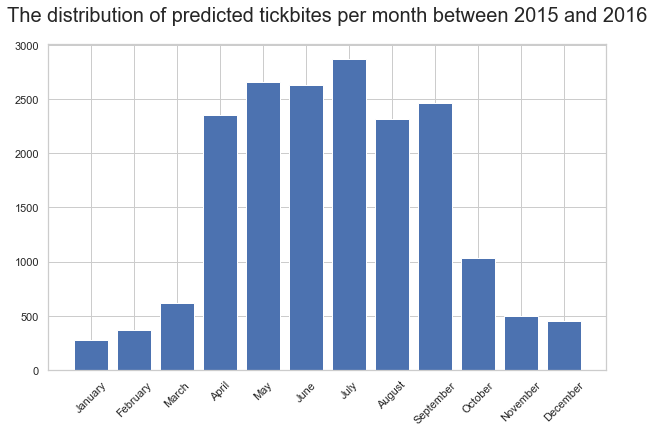

In [62]:
fig, axs = plt.subplots(1,1, figsize=(10,6))

axs.bar(month.index,month['BITE_STATUS'],color='b')
axs.set_xticklabels(month.index,rotation = 45)
axs.set_title("The distribution of predicted tickbites per month between 2015 and 2016",fontsize=20,y=1.05)

plt.savefig("predicetd_tickbites_month.png",dpi=300)

In [63]:
print(df)

          MONTH AGE ACTIVITY LANDUSE  BITE_STATUS
0       January   2        5      60            1
1       January   2        2      20            1
2       January   3        5      20            1
3       January   2        5      62            1
4       January   2        1      60            1
...         ...  ..      ...     ...          ...
18517  December   3        3      60            1
18518  December   2        7      60            1
18519  December   1        3      61            1
18520  December   3        5      60            1
18521  December   2        7      61            1

[18522 rows x 5 columns]


In [64]:
table = pd.pivot_table(df, values='BITE_STATUS', index=['ACTIVITY'],
                    columns=['LANDUSE'], aggfunc=np.sum)

In [65]:
table = table.fillna(0)
table = table.astype('int')
print(table)

LANDUSE     20    60   61   62
ACTIVITY                      
1          234  9399  531  379
2         1885     0    0    0
3          207  2045  204  398
4            7   175   32   72
5           49   622  161  388
6            5    79   13   49
7           74   850  180  484


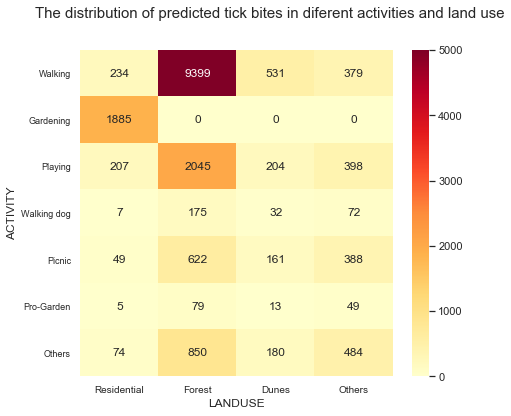

In [66]:
sns.set()
fig, ax = plt.subplots(1,1,figsize=(7,6))
ax = sns.heatmap(table,vmin=0, vmax=5000,cmap="YlOrRd",annot=True,fmt='')
ax.set_yticklabels(label_activity, rotation = 0, fontsize = 9)
ax.set_xticklabels(label_landuse, rotation = 0, fontsize = 10)

fig.suptitle('The distribution of predicted tick bites in diferent activities and land use',fontsize=15)

plt.savefig("predicetd_tickbites_LU_Activity.png",dpi=300)